In [1]:
import pandas as pd
import numpy as np
import pdb
from Analysis_Utils import preprocessing_df as preprocessing
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
def load_exp_block(exp_block_path):
    df = pd.read_pickle(exp_block_path)
    exp_block = preprocessing(df)
    return exp_block

def binarize_dims(dim_string_vector):
    dims = np.zeros((dim_string_vector.shape[0]))
    for il,dim in enumerate(dim_string_vector):
        if '9pt_pidiv3' in dim:
            dims[il] = 3
    return dims

class LoadBlockData:
    def __init__(self, exp_df_paths, rat_list):
        self.rats = rat_list
        self.paths = exp_df_paths
        self.exp_dataframes = []
        self.licking_df = pd.DataFrame()
        self.final_list = []
        self.block_trial_num = 0
        for ez in exp_df_paths:
            self.exp_dataframes.append(load_exp_block(ez))
        self.get_lick_reach_amt_all_block()
        
        return
    
    def vectorize_lick_amt_across_block(self):
        return
    
    def get_lick_reach_amt_all_block(self):
        for ids, df_x in enumerate(self.exp_dataframes):
            rat_id = self.rats[ids]
            #lick_rep = self.vectorize_lick_amt_across_block()
            c=0
            dim_string = np.asarray(df_x['dim'].values)
            dims = binarize_dims(dim_string)
            mean_licks = []
            self.rat_mean_licks = []
            for i, row_value in df_x['Date'].iteritems():
                dims_in = dims[c]
                licks = np.asarray(df_x['lick'].values[c])# Take ith element
                trials = np.asarray(df_x['r_start'].values[c])
                date = row_value
                session = df_x['S'].values[c]
                rat = rat_id
                time_vector = df_x['time'].values[c]
                # Calculate total licks, avg licks/minute, licks/5 minutes
                lick_vector = np.zeros((len(time_vector)))
                lick = list(np.around(np.array(licks), 2))
                time_vector = list(np.around(np.array(time_vector), 2))
                lick_indices = np.intersect1d(lick,time_vector, return_indices=True)[1]
                #pdb.set_trace()
                int_num_trials = trials.shape[0]
                # This is eating up CPU
                lick_vector[lick_indices] = 1  # Mask Array for licking
                sum_licks = sum(lick_vector) # this is number of licks
                if i == 0:
                    dicts = {"lick":lick_vector,"date":date, "session":session, "rat":rat,"dims":dims_in, 'Licks / Minute':sum_licks/15, 
                               "trials":int_num_trials, "reaches/min": int_num_trials/ 15}
                    self.final_list.append(dicts)
                else:
                    lick_dict = {"lick":lick_vector,"date":date, "session":session, "rat":rat,"dims":dims_in, 'Licks / Minute':sum_licks/15, 
                                "trials":int_num_trials, "reaches/min": (int_num_trials*1.55) / 12 }
                    self.final_list.append(lick_dict)
                c+=1
                mean_licks.append(sum_licks)
            self.rat_mean_licks.append(np.mean(mean_licks))
                #hold_lick_df = pd.DataFrame(data = [[licks], [date], [session], [rat]], columns = ['Licks', 'Date', 'Session', 'Rat'])# licking vector
               # hold_lick_df.reset_index(inplace=True, drop=True)
               # self.licking_df.reset_index(inplace=True, drop=True)
               # self.licking_df.concat(hold_lick_df)
        return
    
    
rats = ['14', '13', '12', '11', '15','10', '9', '16']
exp_dataframes = ['DataFrames/RM14_expdf.pickle','DataFrames/RM13_expdf.pickle','DataFrames/RM12_expdf.pickle','DataFrames/RM11_expdf.pickle'
                 ,'DataFrames/RM15_expdf.pickle', 'DataFrames/RM10_expdf.pickle', 'DataFrames/RM9_expdf.pickle','DataFrames/RM16_expdf.pickle']
S = LoadBlockData(exp_dataframes, rats)



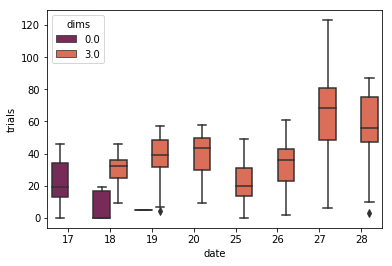

In [10]:
df = pd.DataFrame(S.final_list)
ax = sns.boxplot(x="date", y="trials", hue="dims",
                 data=df, order = ['17', '18', '19', '20', '25', '26', '27', '28'], palette="rocket")
plt.savefig('Trials_Date_Dims_HWNI_2021.png',dpi=1200)

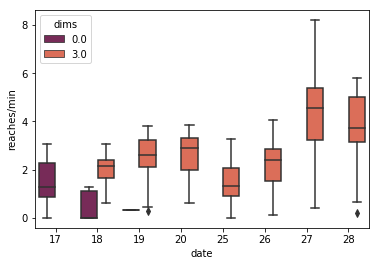

In [9]:

ax = sns.boxplot(x="date", y="reaches/min", hue="dims",
                 data=df, order = ['17', '18', '19', '20', '25', '26', '27', '28'], palette="rocket")
plt.savefig('Reaches_Date_Dims_HWNI_2021.png',dpi=1200)

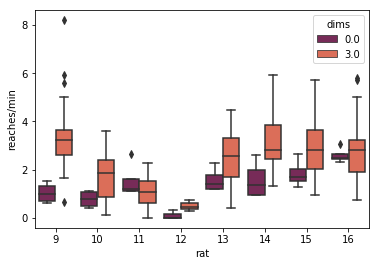

In [15]:
ax = sns.boxplot(x="rat", y="reaches/min", hue="dims",
                 data=df, order = ['9', '10', '11', '12', '13', '14', '15', '16'], palette="rocket")
plt.savefig('reaches_Rat_Dims_HWNI_2021.png',dpi=1200)

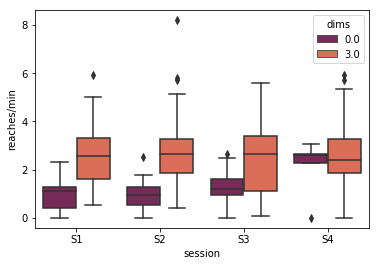

In [14]:
ax = sns.boxplot(x="session", y="reaches/min", hue="dims",
                 data=df, order = ['S1', 'S2', 'S3', 'S4'], palette="rocket")
plt.savefig('Reaches_Session_Dims_HWNI_2021.png',dpi=1200)

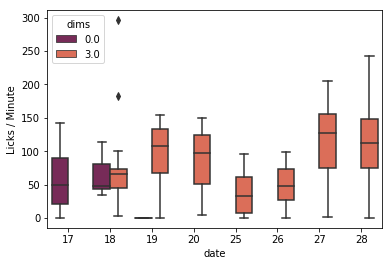

In [3]:

ax = sns.boxplot(x="date", y="Licks / Minute", hue="dims",
                 data=df, order = ['17', '18', '19', '20', '25', '26', '27', '28'], palette="rocket")
plt.savefig('Licks_Date_Dims_HWNI_2021.png',dpi=1200)
#ax = sns.swarmplot(x="date", y="Licks / Minute", data=df,order = ['17', '18', '19', '20', '25', '26', '27', '28'], color=".50")

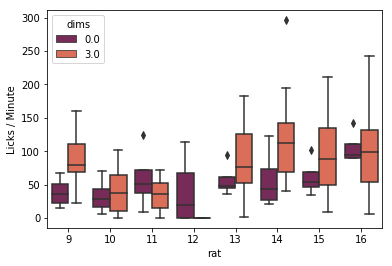

In [4]:
ax = sns.boxplot(x="rat", y="Licks / Minute", hue="dims",
                 data=df, order = ['9', '10', '11', '12', '13', '14', '15', '16'], palette="rocket")
plt.savefig('Licks_Rat_Dims_HWNI_2021.png',dpi=1200)

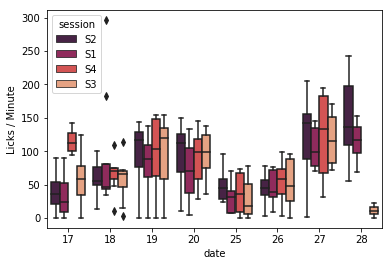

In [5]:
ax = sns.boxplot(x="date", y="Licks / Minute", hue="session",
                 data=df, order = ['17', '18', '19', '20', '25', '26', '27', '28'], palette="rocket")
plt.savefig('Licks_Date_Session_Boxplot_HWNI_2021.png',dpi=1200)

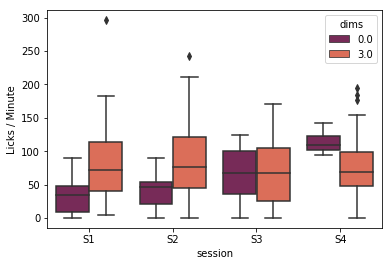

In [6]:
ax = sns.boxplot(x="session", y="Licks / Minute", hue="dims",
                 data=df, order = ['S1', 'S2', 'S3', 'S4'], palette="rocket")

In [7]:
ax = sns.boxplot(x="date", y="Licks / Minute", hue="",
                 data=df, order = ['17', '18', '19', '20', '25', '26', '27', '28'], palette="rocket")

ValueError: Could not interpret input ''